### Fitting latent variables onto data - Exercises & Answers

### 1. Grit revisited - are we *sure* its there?
Armed with new knowledge of CFA, we can now examine directly whether the two-factor structure claimed in the research literature exists in the data we have to hand. While our use of EFA indirectly explored the latent variables in that dataset, with CFA we explicitly test the presence of two factors and set certain questions to load onto these variables. 

First, lets re-obtain the data that has the grit questionnaire in it.

Download the data from this link: https://openpsychometrics.org/_rawdata/duckworth-grit-scale-data.zip

You will need to unzip it and grab the `data.csv` file.

Import everything we need first, adding `semopy` to the list of packages we will use.

### Important ###
After importing everything, run this command just underneath your imports. It'll ensure the results will match when running this code elsehwere.
`np.random.seed(36)`

In [1]:
# Your answer here
# Import what we need
import pandas as pd # dataframes
import seaborn as sns # plots
import statsmodels.formula.api as smf # Models
import marginaleffects as me # marginal effects
import numpy as np # numpy for some functions
import pingouin as pg
from factor_analyzer import FactorAnalyzer # Note we write from factor_analyzer
from horns import parallel_analysis
import semopy as sem # semopy imported here

np.random.seed(36)

Read in the data into a dataframe called grit, specifying the separator as '\t' (sep='\t'), as before.

In [2]:
# Your answer here
# Read in
grit = pd.read_csv('data.csv', sep='\t')
grit.head(10)

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337
5,AU,515,1,2,5,1,3,1,4,5,...,5,2,5,5,Windows,Chrome,1920,1080,2090,554
6,US,126,2,1,3,4,1,1,1,1,...,5,5,5,5,Windows,Chrome,1366,768,36,212
7,RO,208,3,1,1,4,1,3,4,4,...,5,3,4,3,Windows,Chrome,1366,768,6,207
8,EU,130,1,3,3,1,4,1,5,4,...,5,1,4,5,Windows,Microsoft Internet Explorer,1600,1000,14,183
9,NZ,129,2,3,2,2,4,2,4,4,...,4,3,4,4,Macintosh,Chrome,1440,900,68,143


Like before, get the grit-related columns by keeping only the columns with 'GS' in them. Store in a dataframe called `grit2`.

In [3]:
# Your answer here
grit2 = grit.filter(regex='GS\d+')
grit2.head()

,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9,GS10,GS11,GS12
0,1,1,3,3,3,2,3,1,3,2,3,3
1,2,2,3,3,2,1,3,3,2,1,3,2
2,3,3,3,3,4,3,4,4,3,3,3,3
3,1,3,4,2,4,1,5,4,1,1,3,1
4,1,2,3,3,2,2,2,4,3,3,4,4


### Building a latent factor model of grit
We take the model directly stated from the original Duckworth et al (2007) paper that described the grit scale. The questions loading onto the two latent grit factors are as follows:
- Consistency in interest
    - GS2
    - GS3
    - GS5
    - GS7
    - GS8
    - GS11
- Perseverance in effort
    - GS1
    - GS4
    - GS6
    - GS9
    - GS10
    - GS12

With that in mind, create a CFA model that tests whether the two latent variables (consistency and perseverance) are measured by the above stated questionnaire variables. Create it and fit it in `semopy`.

In [4]:
# Your answer here
# Model string
mdspec = """
consistency =~ GS2 + GS3 + GS5 + GS7 + GS8 + GS11
perseverance =~ GS1 + GS4 + GS6 + GS9 + GS10 + GS12
"""

# Create model
model = sem.Model(mdspec)

# Fit it
model.fit(grit2)

SolverResult(fun=0.3782276478265812, success=True, n_it=24, x=array([ 1.122537  ,  1.36719906,  1.39375519,  1.44706539,  0.80596871,
        0.85883226,  1.32252661,  1.43824065,  1.57281968,  1.28650847,
        0.68358768,  1.09217894,  0.98222584,  0.57969277,  0.8487556 ,
        0.96281907,  1.19213773,  0.82104992,  0.57220757,  0.61039529,
        0.78652695,  0.66075116,  0.45345085, -0.2184887 ,  0.29510074]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

If you have fitted the model successfully, inspect the standardised loadings. Do they appear significant and sensible?

In [5]:
# Your answer here
model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,GS2,~,consistency,1.000000,0.590099,-,-,-
1,GS3,~,consistency,1.122537,0.610272,0.035904,31.264817,0.0
2,GS5,~,consistency,1.367199,0.712711,0.039375,34.72214,0.0
3,GS7,~,consistency,1.393755,0.768558,0.038401,36.295186,0.0
4,GS8,~,consistency,1.447065,0.739557,0.040748,35.512611,0.0
5,GS11,~,consistency,0.805969,0.480314,0.030976,26.019401,0.0
6,GS1,~,perseverance,1.000000,0.549115,-,-,-
7,GS4,~,perseverance,0.858832,0.392929,0.041181,20.85489,0.0
8,GS6,~,perseverance,1.322527,0.688657,0.042987,30.765874,0.0
9,GS9,~,perseverance,1.438241,0.692969,0.046594,30.867441,0.0


Finally, check the fit statistics. Is this model any good? Does it describe the data well?

In [6]:
# Your answer here
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,53,66,1615.032056,0.0,15958.962524,0.901715,0.898801,0.873979,0.898801,0.877608,0.083089,49.243545,208.227772,0.378228


What do the guidelines suggest we should do with this model? Do the statistics suggest it fits the model well?

In [7]:
# Your answer here
# Not fully. its close in many regards but only just squeaks across the line.

### 2. Grit and conscientiousness
Let us now expand the use of CFA and dip into the idea of SEM a little. Here we'll expand our previous exercise where we conducted an EFA on scores from the Big 5 trait Conscientiousness at the same time as the grit scale. In the following we'll see what happens if we specify our grit model like we just did, but also include the data for Conscientiousness and its associated questions. As such, we'll find three latent variables (the two grit related ones from the grit questionnaire, and one for Conscientiousness). 

First, get the right questions out of the main `grit` dataframe and store it in a dataframe called `grit_consc`. It should include all questions with `GS` in them and `C`.

In [8]:
# Your answer here
# Get grit and conscientiousness
grit_consc_names = ['GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10', 'GS11', 'GS12',
                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']

# Extract them
grit_consc = grit[grit_consc_names]

# Show 
grit_consc.head()

,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9,GS10,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,1,1,3,3,3,2,3,1,3,2,...,2,4,4,3,2,4,3,2,2,4
1,2,2,3,3,2,1,3,3,2,1,...,4,3,4,3,1,3,5,2,5,3
2,3,3,3,3,4,3,4,4,3,3,...,2,2,4,2,3,4,5,3,3,4
3,1,3,4,2,4,1,5,4,1,1,...,4,1,5,1,4,1,4,1,4,3
4,1,2,3,3,2,2,2,4,3,3,...,3,1,3,1,4,2,3,2,3,4


Set up a CFA model in which the two grit latent variables are captured exactly like in the last exercise, and the conscientiousness variable is captured by its own questions.

In [9]:
# Your answer here
# Model string
mdspec = """
consistency =~ GS2 + GS3 + GS5 + GS7 + GS8 + GS11
perseverance =~ GS1 + GS4 + GS6 + GS9 + GS10 + GS12
conscientious =~ C1 + C2 + C3 + C4 + C5 + C6 + C7 + C8 + C9 + C10
"""

# Create model
model = sem.Model(mdspec)

# Fit it
model.fit(grit_consc)

SolverResult(fun=0.9710707937399814, success=True, n_it=52, x=array([ 1.09309815,  1.33427212,  1.36288773,  1.42898751,  0.78738655,
        0.85031695,  1.39139981,  1.49488101,  1.55740394,  1.34510828,
       -0.94987594,  0.48332316, -1.02903567,  1.07197578, -1.08683903,
        0.76819026, -0.81086835,  1.03272723,  0.65672684,  0.75008356,
        0.79145626,  1.3814536 ,  0.83952471,  1.02987412,  0.9654017 ,
        1.30351542,  0.96074342,  0.90503006,  0.95851657,  0.70041189,
        1.14501598,  0.98512611,  0.56303226,  0.83185583,  0.97223287,
        1.20778227,  0.83141406,  0.54799373,  0.61779007,  0.77584295,
        0.6474266 ,  0.56482701, -0.29713507,  0.47013957,  0.32249194,
       -0.21642159,  0.27898365]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

Inspect the standardised loadings once the model has been estimated.

In [10]:
# Your answer here
model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,GS2,~,consistency,1.000000,0.600909,-,-,-
1,GS3,~,consistency,1.093098,0.605148,0.034553,31.635224,0.0
2,GS5,~,consistency,1.334272,0.708286,0.037744,35.350561,0.0
3,GS7,~,consistency,1.362888,0.765291,0.036736,37.099389,0.0
4,GS8,~,consistency,1.428988,0.743675,0.039184,36.468326,0.0
5,GS11,~,consistency,0.787387,0.477830,0.029993,26.251982,0.0
6,GS1,~,perseverance,1.000000,0.533716,-,-,-
7,GS4,~,perseverance,0.850317,0.378301,0.041874,20.306753,0.0
8,GS6,~,perseverance,1.391400,0.704541,0.044868,31.011095,0.0
9,GS9,~,perseverance,1.494881,0.700401,0.048351,30.916978,0.0


Take a look at the model fit statistics now. What does this suggest to us?

In [11]:
# Your answer here
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,206,231,4146.472289,0.0,29702.88149,0.866297,0.860402,0.84346,0.860402,0.850071,0.066939,92.057858,390.948206,0.971071


What should we conclude? Do these three separate latent factors represent the data well?

In [12]:
# Your answer here
# Not quite! 

### 3. Latent regressions
For the final trick, lets expand the last model we made but include an additional part - this time, we'll use the two grit latent variables to predict the latent conscientiousness score. We'd like to see how well these latent variables can predict conscientiousness. If they are measuring the 'same' kind of trait, then we'd expect to see high coefficients for these. 

Rebuild the model from question 2 but include an additional part where the two grit latent variables predict laten conscientiousness.

In [13]:
# Your answer here
# Model string
mdspec = """
consistency =~ GS2 + GS3 + GS5 + GS7 + GS8 + GS11
perseverance =~ GS1 + GS4 + GS6 + GS9 + GS10 + GS12
conscientious =~ C1 + C2 + C3 + C4 + C5 + C6 + C7 + C8 + C9 + C10

conscientious ~ consistency + perseverance
"""

# Create model
model = sem.Model(mdspec)

# Fit it
model.fit(grit_consc)

SolverResult(fun=0.9710712122615321, success=True, n_it=44, x=array([ 1.09372032,  1.33481513,  1.36326389,  1.42906892,  0.78786201,
        0.8498987 ,  1.3911391 ,  1.4946746 ,  1.55663121,  1.34467594,
       -0.94951483,  0.48329874, -1.02884432,  1.07183657, -1.0865845 ,
        0.768163  , -0.81085453,  1.03271978,  0.65668753,  0.30459112,
       -0.82905879,  0.75009116,  0.79133413,  1.38197185,  0.83954118,
        1.03002355,  0.96546841,  1.30376258,  0.96068456,  0.9050144 ,
        0.95839995,  0.70040618,  1.14535444,  0.98499342,  0.56307038,
        0.83191806,  0.9719378 ,  1.20764937,  0.83116974,  0.54796473,
        0.61777322,  0.7761055 ,  0.64744345,  0.22025482,  0.46986339,
       -0.21635048,  0.27907538]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

Once estimated, inspect the coefficients of that latent regression.

In [14]:
# Your answer here
model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,conscientious,~,consistency,0.304591,0.277782,0.022774,13.37429,0.0
1,conscientious,~,perseverance,-0.829059,-0.582703,0.038286,-21.654358,0.0
2,GS2,~,consistency,1.000000,0.600782,-,-,-
3,GS3,~,consistency,1.093720,0.605312,0.034572,31.636412,0.0
4,GS5,~,consistency,1.334815,0.708377,0.037764,35.346361,0.0
5,GS7,~,consistency,1.363264,0.765289,0.036755,37.09102,0.0
6,GS8,~,consistency,1.429069,0.743540,0.039199,36.456336,0.0
7,GS11,~,consistency,0.787862,0.477969,0.030008,26.255331,0.0
8,GS1,~,perseverance,1.000000,0.533780,-,-,-
9,GS4,~,perseverance,0.849899,0.378213,0.041859,20.303666,0.0


By how much does an increase in latent grit alter conscientiousness?

### 4. Testing the presence of the Big Five - in Big Data
We'll now test the presence of the Big Five in a massive dataset of over 1 million respondents! You can find the dataset here: https://openpsychometrics.org/_rawdata/IPIP-FFM-data-8Nov2018.zip

Download it, unzip it, and read in the `data-final.csv` file, which is an enormous dataset containing responses to a Big 5 Questionnaire (the IPIP). These are the questions, the short-hand prefixes showing what trait the question is measuring:


- EXT1	- I am the life of the party.
- EXT2	- I don't talk a lot.
- EXT3	- I feel comfortable around people.
- EXT4	- I keep in the background.
- EXT5	- I start conversations.
- EXT6	- I have little to say.
- EXT7	- I talk to a lot of different people at parties.
- EXT8	- I don't like to draw attention to myself.
- EXT9	- I don't mind being the center of attention.
- EXT10	- I am quiet around strangers.
- EST1	- I get stressed out easily.
- EST2	- I am relaxed most of the time.
- EST3	- I worry about things.
- EST4	- I seldom feel blue.
- EST5	- I am easily disturbed.
- EST6	- I get upset easily.
- EST7	- I change my mood a lot.
- EST8	- I have frequent mood swings.
- EST9	- I get irritated easily.
- EST10	- I often feel blue.
- AGR1	- I feel little concern for others.
- AGR2	- I am interested in people.
- AGR3	- I insult people.
- AGR4	- I sympathize with others' feelings.
- AGR5	- I am not interested in other people's problems.
- AGR6	- I have a soft heart.
- AGR7	- I am not really interested in others.
- AGR8	- I take time out for others.
- AGR9	- I feel others' emotions.
- AGR10	- I make people feel at ease.
- CSN1	- I am always prepared.
- CSN2	- I leave my belongings around.
- CSN3	- I pay attention to details.
- CSN4	- I make a mess of things.
- CSN5	- I get chores done right away.
- CSN6	- I often forget to put things back in their proper place.
- CSN7	- I like order.
- CSN8	- I shirk my duties.
- CSN9	- I follow a schedule.
- CSN10	- I am exacting in my work.
- OPN1	- I have a rich vocabulary.
- OPN2	- I have difficulty understanding abstract ideas.
- OPN3	- I have a vivid imagination.
- OPN4	- I am not interested in abstract ideas.
- OPN5	- I have excellent ideas.
- OPN6	- I do not have a good imagination.
- OPN7	- I am quick to understand things.
- OPN8	- I use difficult words.
- OPN9	- I spend time reflecting on things.
- OPN10	- I am full of ideas.



In [15]:
# Your answer here
big5 = pd.read_csv('data-final.csv', sep='\t')
big5.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


There are some other columns which can be gotten rid of by running the following code:

In [16]:
# Run this to keep only needed columns
big5 = big5.filter(regex='[A-Z]\d+').loc[:, lambda x: ~x.columns.str.contains('_E')]
big5.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


With the dataset ready, prepare a CFA model that tests whether each of the ten questions load onto their respective latent factor (e.g. EXT1, EXT2 on Extraversion, OPN1, OPN10 onto Openness, and so on).

In [17]:
# Your answer here
# Model string
mdspec = """
extra =~ EXT1 + EXT2 + EXT3 + EXT4 + EXT5 + EXT6 + EXT7 + EXT8 + EXT9 + EXT10
open =~ OPN1 + OPN2 + OPN3 + OPN4 + OPN5 + OPN6 + OPN7 + OPN8 + OPN9 + OPN10
consc =~ CSN1 + CSN2 + CSN3 + CSN4 + CSN5 + CSN6 + CSN7 + CSN8 + CSN9 + CSN10
agree =~ AGR1 + AGR2 + AGR3 + AGR4 + AGR5 + AGR6 + AGR7 + AGR8 + AGR9 + AGR10
neuro =~ EST1 + EST2 + EST3 + EST4 + EST5 + EST6 + EST7 + EST8 + EST9 + EST10
"""

# Create model
model = sem.Model(mdspec)

# Fit it
model.fit(big5) # EDIT THIS

SolverResult(fun=5.362960399983457, success=True, n_it=57, x=array([-1.06200145,  0.95417843, -1.030203  ,  1.08329996, -0.81910411,
        1.18386593, -0.80722522,  0.94436833, -1.02606913, -0.86188908,
        0.96142689, -0.74789625,  1.01326436, -0.82631873,  0.78080518,
        1.01344284,  0.62361959,  1.18156628, -1.09149167,  0.5441523 ,
       -1.07460931,  1.11229093, -1.2430879 ,  0.77959885, -0.80312943,
        1.03367876,  0.60953939, -1.12362769,  0.68604513, -1.43895163,
        1.20265913, -1.16395247,  1.14358636, -1.07432794, -1.40957848,
       -0.85553933, -0.65361763,  0.74696009, -0.480897  ,  0.72871028,
        1.06146634,  1.0741923 ,  1.14944716,  0.97562448,  0.94016725,
        1.43674748,  0.90548163,  0.84803146,  1.4625594 ,  0.52875896,
        0.85281192,  1.00831611,  0.78594071,  0.78610704,  0.64851546,
        0.87507333,  0.91986045,  1.32519691,  0.94056273,  0.9785403 ,
        0.99411219,  1.21806196,  0.96280453,  0.97306684,  1.08424766,
   

Check the model fit statistics:

In [18]:
# Your answer here
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,1165,1225,5.445234e+06,0.0,1.902557e+07,0.713837,0.713794,0.699054,0.713794,0.699099,0.067841,209.274079,1510.654937,5.36296


Based on this truly massive dataset, what do we make of the Big 5 model? 

### 5. Exploring and confirming
For the final exercise, we'll see how EFA and CFA work together. 

The last dataset we'll see contains a series of scales that researchers thought might measure the 'DISC' personality model (see [here](https://en.wikipedia.org/wiki/DISC_assessment)), which has four central traits:

- Dominance: active use of force to overcome resistance in the environment
- Inducement: use of charm in order to deal with obstacles
- Submission: warm and voluntary acceptance of the need to fulfill a request
- Compliance: fearful adjustment to a superior force.

This model of personality is used in business, but has no real empirical underpinning. To try to address this, researchers took four sub-scale measures from the IPIP, which measure similar-sorts of things - namely, **assertiveness, social confidence, adventurousness, and dominance**.

Our goal now will be to *explore* a set of latent factors in *half* of this data, and then *confirm* it in the other half. Thus, we will use both EFA and CFA.

First, lets read in the data, which is accessible from here: http://openpsychometrics.org/_rawdata/AS+SC+AD+DO.zip 

Extract the `data.csv` file and read it in, and show the head. I've renamed it `data-disc.csv` my end and read it in with that title.

In [19]:
# Your answer here
disc = pd.read_csv('data-disc.csv')
disc.head()

,AS1,AS2,AS3,AS4,AS5,AS6,AS7,AS8,AS9,AS10,...,DO3,DO4,DO5,DO6,DO7,DO8,DO9,DO10,age,gender
0,4,4,3,3,5,4,1,3,1,1,...,3,1,3,2,5,4,2,1,29,2
1,4,3,4,4,3,2,3,3,4,3,...,3,2,3,2,3,3,2,2,49,2
2,5,4,4,5,3,3,2,2,1,1,...,3,3,3,4,4,5,2,3,52,1
3,4,3,3,2,3,3,4,3,4,1,...,3,3,4,4,4,5,3,1,34,2
4,4,4,4,4,4,3,2,1,2,0,...,4,3,4,3,5,5,4,4,52,2


The column names here represent the four sub-scales, like so:

- **Assertiveness**
    - AS1 Express myself easily.
    - AS2 Try to lead others.
    - AS3 Automatically take charge.
    - AS4 Know how to convince others.
    - AS5 Am the first to act.
    - AS6 Take control of things.
    - AS7 Wait for others to lead the way.
    - AS8 Let others make the decisions.
    - AS9 Am not highly motivated to succeed.
    - AS10 Can't come up with new ideas.
- **Social Confidence**
    - SC1 Feel comfortable around people.
    - SC2 Don't mind being the center of attention.
    - SC3 Am good at making impromptu speeches.
    - SC4 Express myself easily.
    - SC5 Have a natural talent for influencing people.
    - SC6 Hate being the center of attention.
    - SC7 Lack the talent for influencing people.
    - SC8 Often feel uncomfortable around others.
    - SC9 Don't like to draw attention to myself.
    - SC10 Have little to say.
- **Adventurousness**
    - AD1 Prefer variety to routine.
    - AD2 Like to visit new places.
    - AD3 Interested in many things.
    - AD4 Like to begin new things.
    - AD5 Prefer to stick with things that I know.
    - AD6 Dislike changes.
    - AD7 Don't like the idea of change.
    - AD8 Am a creature of habit.
    - AD9 Dislike new foods.
    - AD10 Am attached to conventional ways.
- **Dominance**
    - DO1 Try to surpass others' accomplishments.
    - DO2 Try to outdo others.
    - DO3 Am quick to correct others.
    - DO4 Impose my will on others.
    - DO5 Demand explanations from others.
    - DO6 Want to control the conversation.
    - DO7 Am not afraid of providing criticism.
    - DO8 Challenge others' points of view.
    - DO9 Lay down the law to others.
    - DO10 Put people under pressure.

The first task is to prepare the data. Drop the `age` and `gender` columns, and the use the `.sample` dataframe method to extract 50% of the data for exploration and the other half for confirmation. This can be a tricky step, so take care.

In [20]:
# Your answer here
# Drop columns
disc = disc.drop(columns=['age', 'gender'])

# Sample half
explore = disc.sample(frac=.50, random_state=42)

# Get the other half not in the first half
confirm = disc[~disc.index.isin(explore.index)]

Fit an EFA to the first half of the data. Lets start with four factors, which would represent the four subscales. What does that solution look like? Fit it and examine a plot of the loadings.

If you want the figure to be larger, you can run the following lines of code before you make a heatmap:
`import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))`

<Axes: >

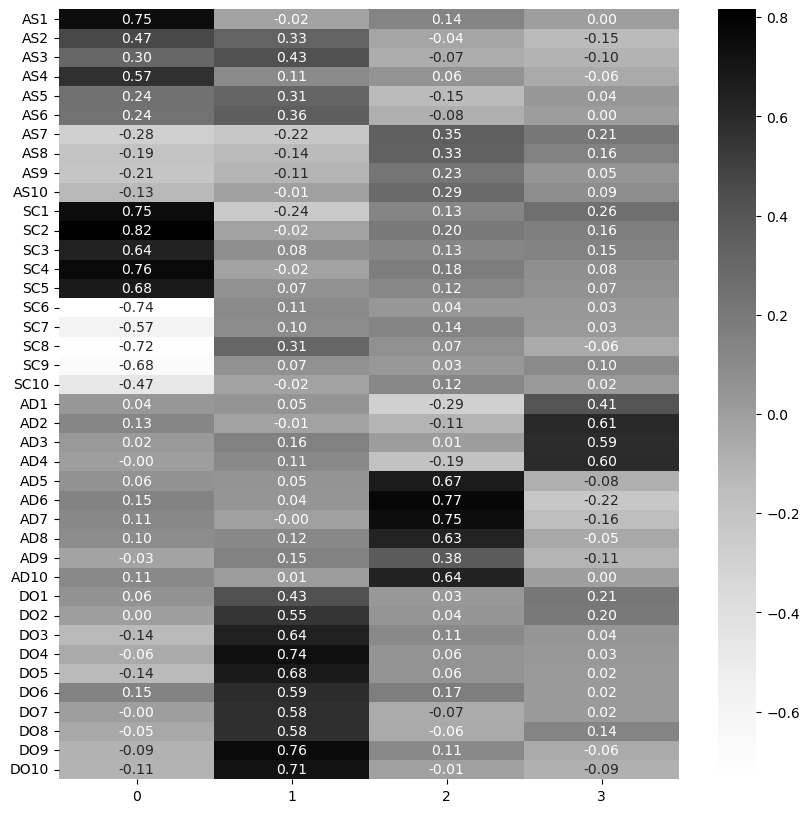

In [21]:
# Your answer here
# EFA
efa = FactorAnalyzer(n_factors=4).fit(explore)

# Get loadings
loadings = pd.DataFrame(efa.loadings_, index=explore.columns)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(loadings, annot=True, cmap='Grays', fmt='.2f')

We can see immediately that aspects of the Assertiveness and Social Confidence scales align with the first factor, dominance with the second, adventurousness with the third, while some questions in adventurousness (e.g. 1-4) seem to align with the fourth factor. Examine the variance explained next.

In [22]:
# Your answer here
efa.get_factor_variance()

(array([6.4104039 , 4.89054046, 3.33641926, 1.72314879]),
 array([0.1602601 , 0.12226351, 0.08341048, 0.04307872]),
 array([0.1602601 , 0.28252361, 0.36593409, 0.40901281]))

This explains around 40%, with the most common from the first two factors. Perhaps we could do away with a 4 factor solution and retain a 3 factor one? Fit that below.

<Axes: >

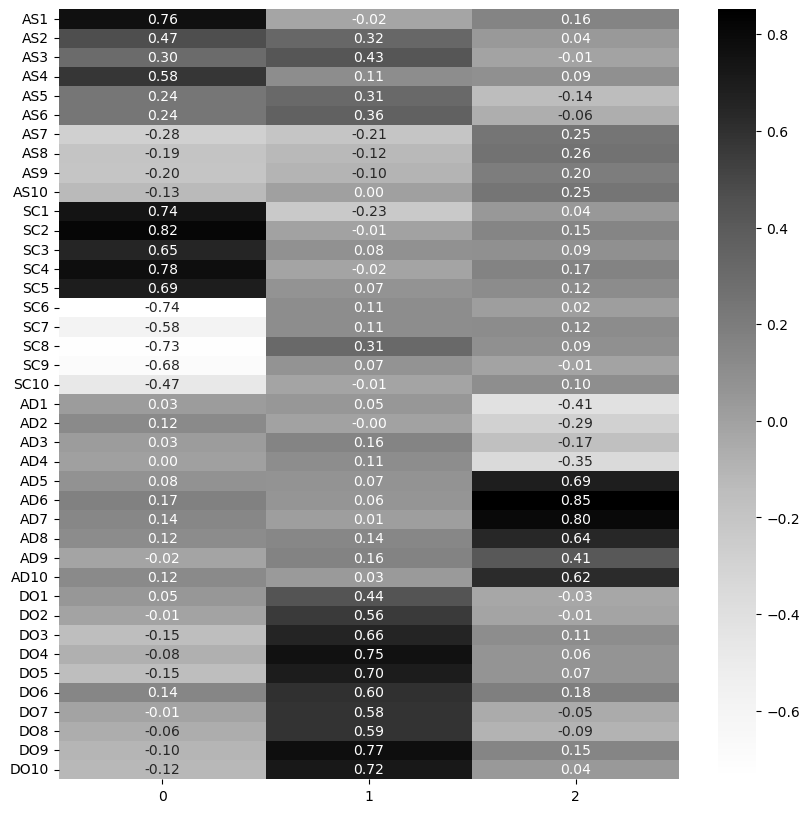

In [23]:
# Your answer here
# EFA
efa = FactorAnalyzer(n_factors=3).fit(explore)

# Get loadings
loadings = pd.DataFrame(efa.loadings_, index=explore.columns)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(loadings, annot=True, cmap='Grays', fmt='.2f')

Examine the variance of this fit.

In [24]:
# Your answer here
efa.get_factor_variance()

(array([6.54110144, 5.0344487 , 3.69496587]),
 array([0.16352754, 0.12586122, 0.09237415]),
 array([0.16352754, 0.28938875, 0.3817629 ]))

This loses only around 2% variance and has some more informative factors. We'll then say there are three factors underpinning this four-questionnaire test. The first captures Assertiveness and Social Confidence, the second dominance, and the third adventurousness.

Now, how might we translate this setup into a CFA model that we can test on the other half of the data?

One straightforward way would be to use a coarse measure as just described above - that is, *all* questions for assertiveness and social confidence go on one factor, all dominance questions on another, and all adventurousness questions on the final one. 

Build that below, but using the other slice of the data to confirm whether this structure 'holds'. Check the fit statistics.

In [25]:
# Your answer here
# Model string
mdspec = """
latent1 =~ AS1 + AS2 + AS3 + AS4 + AS5 + AS6 + AS7 + AS8 + AS9 + AS10 + SC1 + SC2 + SC3 + SC4 + SC5 + SC6 + SC7 + SC8 + SC9 + SC10
latent2 =~ DO1 + DO2 + DO3 + DO4 + DO5 + DO6 + DO7 + DO8 + DO9 + DO10
latent3 =~ AD1 + AD2 + AD3 + AD4 + AD5 + AD6 + AD7 + AD8 + AD9 + AD10
"""

# Create model
model = sem.Model(mdspec)

# Fit it
model.fit(confirm) 

# Fit statistics
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,737,780,4041.373173,0.0,9776.734335,0.632714,0.586634,0.562516,0.586634,0.611285,0.094506,149.930922,500.239906,8.034539


That does not look great! Inspect whether the individual coefficients are associated in the way we'd expect:

In [26]:
# Your answer here
model.inspect(std_est=True).query('op == "~"')

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,AS1,~,latent1,1.000000,0.704852,-,-,-
1,AS2,~,latent1,0.818380,0.609185,0.063324,12.923657,0.0
2,AS3,~,latent1,0.826251,0.596697,0.065244,12.664005,0.0
3,AS4,~,latent1,0.803585,0.645872,0.058724,13.68413,0.0
4,AS5,~,latent1,0.668898,0.496057,0.063347,10.559247,0.0
5,AS6,~,latent1,0.621050,0.471490,0.061842,10.042551,0.0
6,AS7,~,latent1,-0.679325,-0.518800,0.061552,-11.036618,0.0
7,AS8,~,latent1,-0.452216,-0.344830,0.061406,-7.364376,0.0
8,AS9,~,latent1,-0.400243,-0.269313,0.069506,-5.758391,0.0
9,AS10,~,latent1,-0.311342,-0.229752,0.063346,-4.914959,0.000001


These seem to match the pattern seen in the loadings, broadly, but our model fit suggests this is not good. As a final push, we could consider trying to reflect the loadings we saw from EFA more closely. From the loadings matrix we can actually discern which factor each question had the highest affinity with by using the `.idxmax(axis='columns')` command, like so:

`loadings.idxmax(axis='columns')`

Run that below and examine the output.

In [27]:
# You answer here
loadings.idxmax(axis='columns')

AS1     0
AS2     0
AS3     1
AS4     0
AS5     1
AS6     1
AS7     2
AS8     2
AS9     2
AS10    2
SC1     0
SC2     0
SC3     0
SC4     0
SC5     0
SC6     1
SC7     2
SC8     1
SC9     1
SC10    2
AD1     1
AD2     0
AD3     1
AD4     1
AD5     2
AD6     2
AD7     2
AD8     2
AD9     2
AD10    2
DO1     1
DO2     1
DO3     1
DO4     1
DO5     1
DO6     1
DO7     1
DO8     1
DO9     1
DO10    1
dtype: int64

What is interesting here is that reveals a rather disparate pattern for the assertiveness scale. Some questions loading on factor 0 (the first) while others are more associated with the second factor, which was related to dominance. Consider AS3 - "automatically take charge". Should we be surprised this is more closely associated with a different factor? We can try to recreate this by tying each question as shown above to a specific factor. This is a tricky process. See if you can build this model below and examnine its fit statistic. It will more closely resemble the EFA, and may emerge as a better model.

In [28]:
# Your answer here
mdspec = """
latent1 =~ AS1 + AS2 + AS4 + SC1 + SC2 + SC3 + SC4 + SC5 + AD2
latent2 =~ DO1 + DO2 + DO3 + DO4 + DO5 + DO6 + DO7 + DO8 + DO9 + DO10 + AS3 + AS5 + AS6 + SC6 + SC8 + SC9 + AD1 + AD3 + AD4
latent3 =~ AS7 + AS8 + AS9 + AS10 + SC7 + SC10 + AD5 + AD6 + AD7 + AD8 + AD9 + AD10
"""

# Create model
model = sem.Model(mdspec)

# Fit it
model.fit(confirm) 

# Fit statistics
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,737,780,4906.10706,0.0,9776.734335,0.536598,0.498185,0.468907,0.498185,0.509561,0.106154,146.492616,496.8016,9.753692


Amusingly, this is *even worse*. Despite our best efforts, we're unable to create a solid, stable set of latent variables that underpin this collection of data. This is a common experience, and the field of psychology has numerous measurement issues to which poor latent factor models contribute. Nonetheless, EFA and CFA are incredibly powerful approaches but they need to be treated with a lot of circumspection.